## Light GBM

In [1]:
# pip install lightgbm

In [2]:
# Importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
import lightgbm as lgb
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load dataset 
# Select features (X) and target variable (y)
testing_data=pd.read_csv('testing_data.csv')
training_data= pd.read_csv('new1.csv')
# Training data
X_train = training_data[['co', 'no2', 'o3', 'pm10', 'pm25', 'so2']]  # Features for training
y_train = training_data['aqi']  # Target variable (AQI) for training

# Testing data
X_test = testing_data[['co', 'no2', 'o3', 'pm10', 'pm25', 'so2']]  # Features for testing
y_test = testing_data['aqi']  # Target variable (AQI) for testing

C:\Users\PMLS\AppData\Local\Temp\ipykernel_55240\1359625343.py:4: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  training_data= pd.read_csv('new1.csv')


In [4]:
# Create and train the LightGBM model
lgb_model = lgb.LGBMRegressor(random_state=42)
lgb_model.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001209 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info] Number of data points in the train set: 68218, number of used features: 6
[LightGBM] [Info] Start training from score 91.610775


LGBMRegressor(random_state=42)

In [5]:
# Make predictions
y_pred = lgb_model.predict(X_test)

In [6]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
score = lgb_model.score(X_test, y_test)


In [7]:
# Print evaluation metrics
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {r2}")
print(f"Score of  : {score*100}%")
print(f"Mean Absolute Error: {mae}")

Mean Squared Error: 170.44273200664145
Root Mean Squared Error: 13.055371768227875
R-squared: 0.9418178710735657
Score of  : 94.18178710735657%
Mean Absolute Error: 3.374270500495823


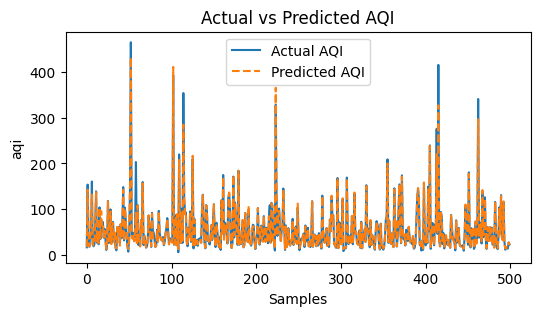

In [10]:
# Plotting Actual vs Predicted AQI
plt.figure(figsize=(6,3))
plt.plot(y_test.values[:500], label='Actual AQI')
plt.plot(y_pred[:500], label='Predicted AQI', linestyle='--')
plt.title('Actual vs Predicted AQI')
plt.xlabel('Samples')
plt.ylabel('aqi')
plt.legend()
plt.show()

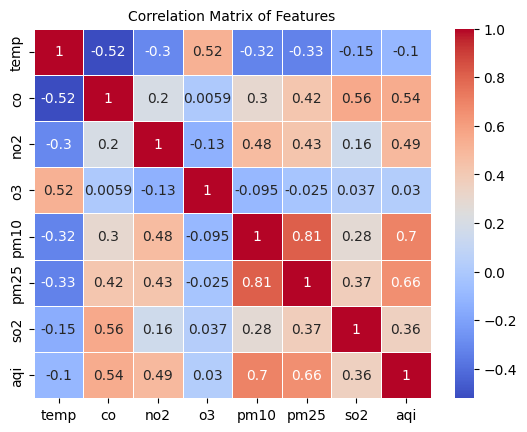

<Figure size 600x450 with 0 Axes>

In [11]:
# Compute the correlation matrix
correlation_matrix = training_data[['temp', 'co', 'no2', 'o3', 'pm10', 'pm25', 'so2', 'aqi']].corr()
# Use seaborn heatmap for better visualization
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
# Adding title
plt.title('Correlation Matrix of Features', fontsize=10)
plt.figure(figsize=(6, 4.5))
# Display the plot
plt.show()